In [99]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import math
import importlib

import IrisLocalization
import IrisNormalization
import IrisEnhancement
import IrisFeatureExtraction
import IrisMatching
import IrisPerformanceEvaluation

importlib.reload(IrisLocalization)
importlib.reload(IrisNormalization)
importlib.reload(IrisEnhancement)
importlib.reload(IrisFeatureExtraction)
importlib.reload(IrisMatching)
importlib.reload(IrisPerformanceEvaluation)

<module 'IrisPerformanceEvaluation' from 'c:\\Users\\Javier Jiang\\Desktop\\Courses\\STAT5293 Applied Machine Learning for Image Analysis\\Iris-Recognization-Project\\IrisPerformanceEvaluation.py'>

In [27]:
def generateFeatureVector(image, incir, outcir, rotate):
    
    img = IrisNormalization.Normalization(image, incir, outcir, rotate)
    img = IrisEnhancement.Enhancement(img)
    V = IrisFeatureExtraction.FeatureExtraction(img)

    return V

In [28]:
def extractImage(flag):
    # flag: 1 if you want to extract train data, 2 if test data
    images = []
    source = 'CASIA Iris Image Database (version 1.0)/'
    n_eye = 108
    if flag == 1: # train data
        n = 3
    elif flag == 2: # test data
        n = 4

    for i in range(1, n_eye+1): # we need to change 2 -> n_eye!
        for j in range(1, n+1):
            path = source + '%03d' % (i,) + '/' + str(flag) + '/'
            filename = '%03d' % (i,) + '_' + str(flag) + '_' + str(j) + '.bmp'
            image = cv2.imread(path + filename)
            images.append(image)
            
    return images

In [29]:
train_images = extractImage(1)
test_images = extractImage(2)

train_vecs = []
test_vecs = []

for image in train_images:
    incir, outcir = IrisLocalization.Localization(image)
    degrees = [-9,-6,-3,0,3,6,9]
    for degree in degrees:
        V = generateFeatureVector(image, incir, outcir, degree)
        train_vecs.append(V)
train_vecs = np.array(train_vecs)

for image in test_images:
    incir, outcir = IrisLocalization.Localization(image)
    V = generateFeatureVector(image, incir, outcir, 0)
    test_vecs.append(V)
test_vecs = np.array(test_vecs)
    

In [32]:
n_components_list = [20,40,60,80,107]
df_min_list = []
df_minmeasure_list = []

for n_components in n_components_list:
    df_min,df_minmeasure = IrisMatching.Matching(train_vecs, test_vecs,n_components)
    df_min_list.append(df_min)
    df_minmeasure_list.append(df_minmeasure)

CRR by L1 distance measure: 88.889
CRR by L2 distance measure: 89.120
CRR by Cosine similarity measure: 92.593
Threshold 0.446: FNMR = 0.03125, FMR = 0.2225
Threshold 0.472: FNMR = 0.03125, FMR = 0.195
Threshold 0.502: FNMR = 0.0625, FMR = 0.155


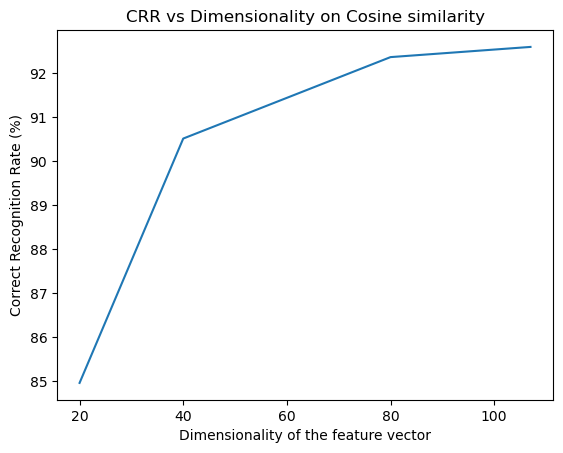

In [100]:
IrisPerformanceEvaluation.PerformanceEvaluation(df_min_list,df_minmeasure_list,n_components_list)